In [166]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [167]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [168]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

## Nulos

In [170]:
#Cantidad de nulos por columnas
df.isnull().sum()

ID                                       0
Region                                   0
Territory                                0
Pricing, Delivery_Terms_Quote_Appr       0
Pricing, Delivery_Terms_Approved         0
Bureaucratic_Code_0_Approval             0
Bureaucratic_Code_0_Approved             0
Submitted_for_Approval                   0
Bureaucratic_Code                        0
Account_Created_Date                     0
Source                                   0
Billing_Country                          0
Account_Name                             0
Opportunity_Name                         0
Opportunity_ID                           0
Sales_Contract_No                        0
Account_Owner                            0
Opportunity_Owner                        0
Account_Type                             0
Opportunity_Type                         0
Quote_Type                               0
Delivery_Terms                           0
Opportunity_Created_Date                 0
Brand      

###### Ojo ID es el id del cada registro (osea de cada fila que es único por fila), que no es igual a Opportunity_ID (ID de la oportunidad), ya que puedo tener varios registros (filas) para una misma oportunidad.

In [171]:
df['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

## 1. Stage

* #### Stage es nuestra variable target, variable que nos indica el estado de la oportunidad, o sea si la oportunidad resultó en éxito o no (closed won o closed lost respectivamente).

In [172]:
# Veamos sus valores únicos y cantidades
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

* #### Se observa en dicha variable que, además de los estados que indican si una oportunidad resultó exitosa o no (**estados finales**), tenemos otros 3 estados (Proposal, Negotiation y Qualification) que corresponden a **estados intermedios** que tienen las oportunidades dentro del pipeline que desarrolla la empresa.

* #### Como con esta variable se estará luego tratando de predecir la “Probabilidad de éxito” para cada oportunidad, o sea ¿Cuál es la probabilidad de que la oportunidad se convierta en un caso Closed Won? .Que decisión debemos tomar con dichos estados? Dichos estados al no tener una resolución, debemos asignarle arbitrariamente algún estado final? Debemos filtrar estos casos?

> * #### Luego de analizar esos registros con estados intermedios y tenindo en cuenta que corresponden a unos pocos casos, tomamos la decisión de filtrar estos registros y quedarnos solamente con los que tienen un estado final definido.

##### En la mayoría de los casos exitosos la fecha de ultima modificación de la oportunidad es menor a la fecha de expiración del presupuesto(esa modificación fue para colocar el estado en exitoso). Hay algunos casos en los que la fecha de ultima modificación es menor a la fecha de expiración del presupuesto pero con pocos días de distancia y fueron declarados como no exitosos

In [173]:
df = df.loc[(df['Stage']!='Proposal') & (df['Stage']!='Negotiation') & (df['Stage']!='Qualification'),:]

### En nuestro set de datos: ¿Cuántas oportunidades resultaron exitosas y cuantas no lo fueron?

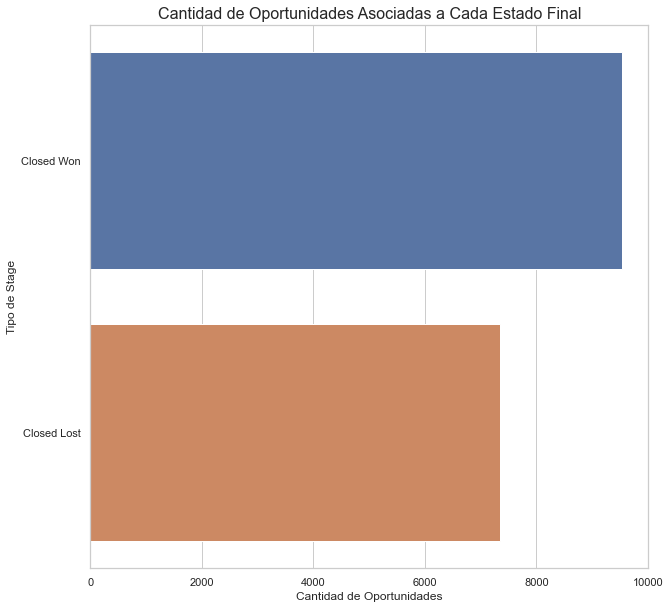

In [176]:
target = df['Stage'].value_counts()
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index)
grafico_top_key.set_title("Cantidad de Oportunidades Asociadas a Cada Estado Final",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=12)
grafico_top_key.set_ylabel("Tipo de Stage",fontsize=12);

### Región: (Acá debería poner a Japón como APAC)

In [177]:
df['veces'] = 1
mi_map=pd.crosstab(df['Region'], df['Stage'],values=df.veces,aggfunc=np.sum)

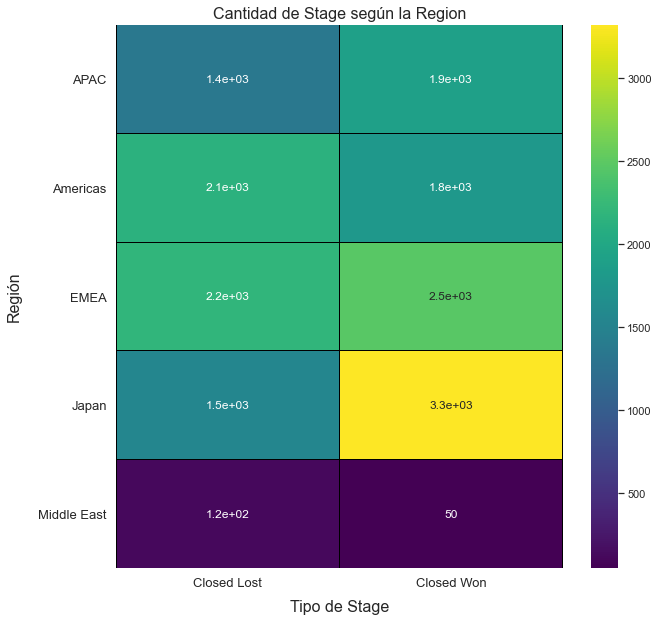

In [178]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Stage según la Region", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Región", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

In [179]:
df.Region.value_counts()

Japan          4869
EMEA           4660
Americas       3933
APAC           3251
Middle East     170
Name: Region, dtype: int64

In [180]:
df.Territory.value_counts().head(30)

None              4981
Germany           1682
NW America        1560
Australia         1202
India              807
NE America         760
Japan              676
Netherlands        532
SE America         489
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
Central US         254
China (PRC)        218
SW America         206
Thailand           173
Indonesia          151
Austria            145
Philippines        109
Jordan             100
Canada              74
Luxembourg          70
Portugal            66
Poland              59
Vietnam             51
Cyprus              44
Denmark             38
Name: Territory, dtype: int64

In [181]:
df.loc[(df['Region']=='Japan')|(df['Territory']=='Japan'),['Region','Territory']].tail(30)

,Region,Territory
16897,Japan,None
16898,Japan,None
16899,Japan,None
16900,Japan,None
16901,Japan,None
16902,Japan,None
16903,Japan,None
16904,Japan,None
16905,Japan,None
16906,Japan,None


In [182]:
# Para los casos en que tenga a Japon como Region y a None como Territory le asigno Japón a Territory, sinó lo dejo como está
df['Territory'] = df.apply(lambda row: row['Region'] if ((row['Territory']=='None') & (row['Region']=='Japan')) else row['Territory'],axis=1)

In [183]:
df.loc[(df['Region']=='Japan')|(df['Territory']=='Japan'),['Region','Territory']].tail(30)

,Region,Territory
16897,Japan,Japan
16898,Japan,Japan
16899,Japan,Japan
16900,Japan,Japan
16901,Japan,Japan
16902,Japan,Japan
16903,Japan,Japan
16904,Japan,Japan
16905,Japan,Japan
16906,Japan,Japan


In [184]:
# Dejo Japón solo como territorio y como Región le asigno APAC (Asia-Pacífico)
df.loc[df['Region']=='Japan','Region']='APAC'

In [185]:
df.Territory.value_counts().head(30)

Japan             4869
Germany           1682
NW America        1560
Australia         1202
India              807
None               788
NE America         760
Netherlands        532
SE America         489
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
Central US         254
China (PRC)        218
SW America         206
Thailand           173
Indonesia          151
Austria            145
Philippines        109
Jordan             100
Canada              74
Luxembourg          70
Portugal            66
Poland              59
Vietnam             51
Cyprus              44
Denmark             38
Name: Territory, dtype: int64

In [186]:
df.Region.value_counts()

APAC           8120
EMEA           4660
Americas       3933
Middle East     170
Name: Region, dtype: int64

In [187]:
df['veces'] = 1
mi_map=pd.crosstab(df['Region'], df['Stage'],values=df.veces,aggfunc=np.sum)

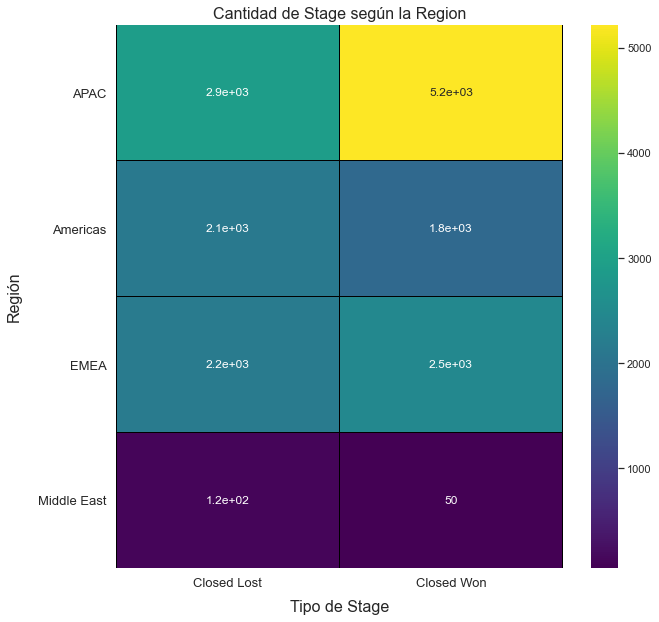

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Stage según la Region", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Región", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

In [189]:
### Ahora APAC Pasó de tener un 57,6% de oportunidades exitosas a tener 64,2% de oportunidades exitosas

## Territory

In [190]:
exitosos=df.loc[df['Stage']=='Closed Won',['Territory']]
no_exitosos=df.loc[df['Stage']=='Closed Lost',['Territory']]

In [231]:
exitosos.head()

,Opportunity_Owner
1,Person_Name_20
2,Person_Name_8
7,Person_Name_8
23,Person_Name_49
63,Person_Name_13


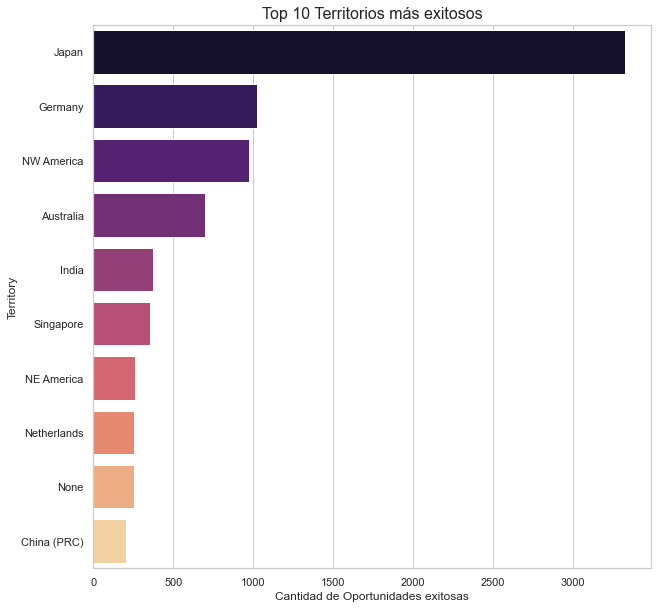

In [192]:
target = exitosos['Territory'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Territorios más exitosos",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Territory",fontsize=12);

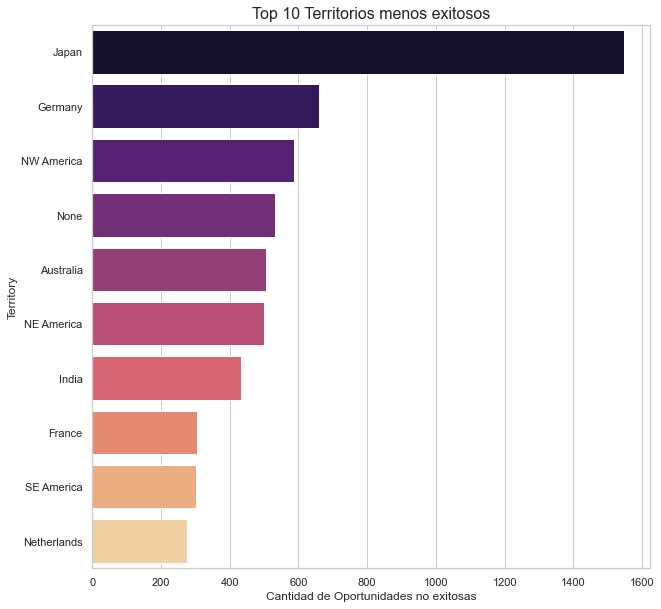

In [193]:
target = no_exitosos['Territory'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index, palette="magma")
grafico_top_key.set_title("Top 10 Territorios menos exitosos",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades no exitosas",fontsize=12)
grafico_top_key.set_ylabel("Territory",fontsize=12);

## Vendedores Responsables de la Oportunidad

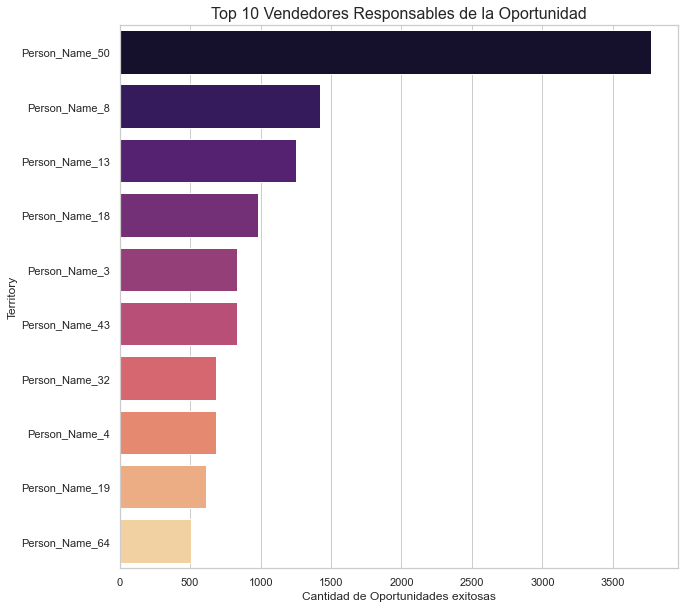

In [194]:
target = df['Opportunity_Owner'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Territory",fontsize=12);

In [195]:
exitosos=df.loc[df['Stage']=='Closed Won',['Opportunity_Owner']]
no_exitosos=df.loc[df['Stage']=='Closed Lost',['Opportunity_Owner']]

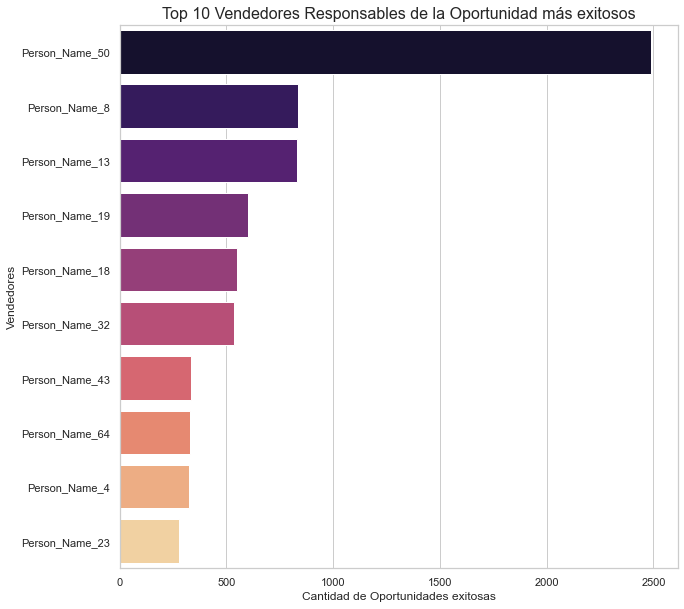

In [215]:
target = exitosos['Opportunity_Owner'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad más exitosos",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

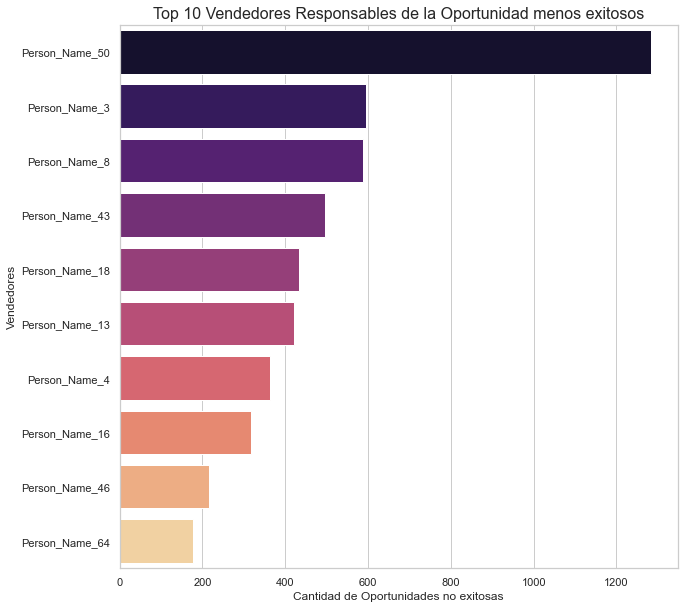

In [216]:
target = no_exitosos['Opportunity_Owner'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad menos exitosos",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades no exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

#### Mejores y peores vendedores en terminos relativos, filtrando cantidad de ventas >=100

In [224]:
vendedores = df[['Opportunity_Owner','Stage']]

In [225]:
vendedores['veces'] = 1
vendedores_oprtunidades=pd.crosstab(vendedores['Opportunity_Owner'], df['Stage'],values=vendedores.veces,aggfunc=np.sum).reset_index()

C:\Users\mikef\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [226]:
vendedores_oprtunidades=vendedores_oprtunidades.fillna(0)
vendedores_oprtunidades['Total_ventas'] = vendedores_oprtunidades['Closed Lost']+ vendedores_oprtunidades['Closed Won']
vendedores_oprtunidades['Ratio_ventas_exitosas'] = vendedores_oprtunidades['Closed Won']/vendedores_oprtunidades['Total_ventas']*100
vendedores_oprtunidades.head()

Stage,Opportunity_Owner,Closed Lost,Closed Won,Total_ventas,Ratio_ventas_exitosas
0,Person_Name_0,1.0,0.0,1.0,0.000000
1,Person_Name_10,2.0,0.0,2.0,0.000000
2,Person_Name_11,51.0,26.0,77.0,33.766234
3,Person_Name_12,16.0,7.0,23.0,30.434783
4,Person_Name_13,421.0,832.0,1253.0,66.400638


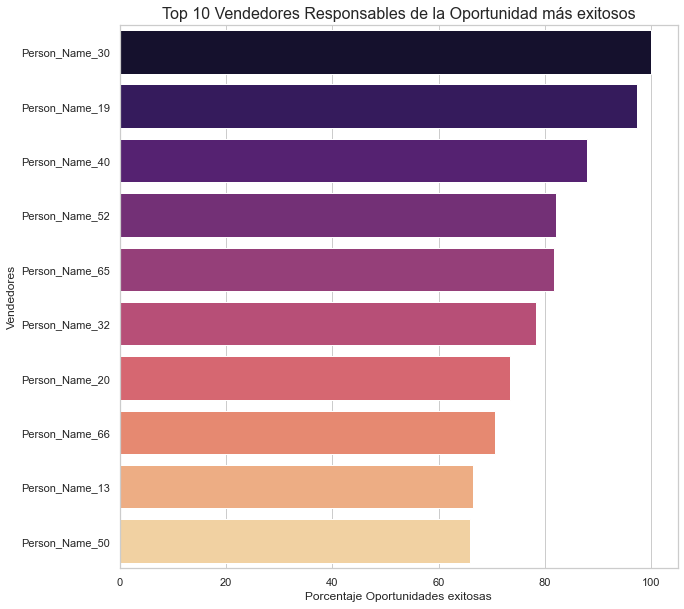

In [227]:
target = vendedores_oprtunidades.nlargest(10,'Ratio_ventas_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_ventas_exitosas,y=target.Opportunity_Owner,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad más exitosos",fontsize=16)
grafico_top_key.set_xlabel("Porcentaje Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

#### Utilizando el filtro de total de ventas >=100

In [228]:
vendedores_oprtunidades=vendedores_oprtunidades.loc[vendedores_oprtunidades['Total_ventas']>=100]

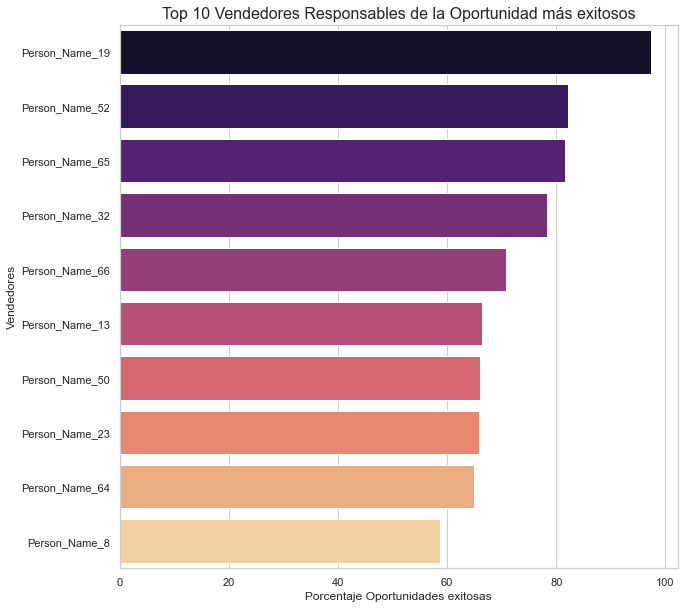

In [229]:
target = vendedores_oprtunidades.nlargest(10,'Ratio_ventas_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_ventas_exitosas,y=target.Opportunity_Owner,palette="magma")
grafico_top_key.set_title("Top 10 Vendedores Responsables de la Oportunidad más exitosos",fontsize=16)
grafico_top_key.set_xlabel("Porcentaje Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Vendedores",fontsize=12);

### Datos Temporales

In [233]:
df.loc[(df['Stage']=='Closed Won'),['ID','Opportunity_ID','Stage','Account_Created_Date'\
,'Opportunity_Created_Date','Last_Activity','Quote_Expiry_Date','Last_Modified_Date','Planned_Delivery_Start_Date','Planned_Delivery_End_Date'\
,'Actual_Delivery_Date']].head(10)

,ID,Opportunity_ID,Stage,Account_Created_Date,Opportunity_Created_Date,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Actual_Delivery_Date
1,27760,1,Closed Won,6/16/2015,12/7/2015,NaT,1/20/2016,1/15/2016,1/18/2016,1/20/2016,NaT
2,27446,2,Closed Won,4/21/2015,12/8/2015,NaT,9/30/2016,9/29/2016,1/25/2016,1/25/2016,NaT
7,27455,7,Closed Won,4/21/2015,12/9/2015,NaT,1/7/2016,12/9/2015,1/25/2016,1/25/2016,NaT
23,28524,11,Closed Won,10/13/2015,12/9/2015,NaT,3/31/2016,1/7/2016,1/9/2016,1/15/2016,NaT
63,13392,20,Closed Won,7/27/2013,12/9/2015,NaT,1/8/2016,12/9/2015,1/18/2016,1/29/2016,NaT
64,19342,21,Closed Won,8/22/2013,12/10/2015,NaT,NaT,2/22/2017,3/1/2016,3/31/2016,NaT
65,24444,22,Closed Won,4/20/2015,12/10/2015,NaT,1/5/2016,1/5/2016,1/8/2016,1/8/2016,NaT
66,18491,23,Closed Won,1/8/2014,12/10/2015,NaT,12/15/2015,1/12/2017,1/8/2016,1/12/2016,NaT
67,18494,24,Closed Won,1/8/2014,12/10/2015,NaT,12/16/2015,1/12/2017,1/15/2016,1/19/2016,NaT
70,19680,27,Closed Won,7/27/2013,12/12/2015,NaT,12/15/2015,1/12/2017,1/26/2016,1/29/2016,NaT
